# 0. Padding & Stride & Pooling
- 컨볼루션 레이어를 적용할때 주로 사용되는 옵션 : Padding & Stride
- CNN을 구성할때 컨볼루션 레이어와 함께 자주 사용되는 레이어

## 0-1 Padding
- 컨볼루션 적용전, 입력 이미지의 테두리 값을 추가하여 채워넣는 것
- 2가지의 중요한 목적
    1. **이미지 크기 유지**
    2. **테두리 정보 보존**   
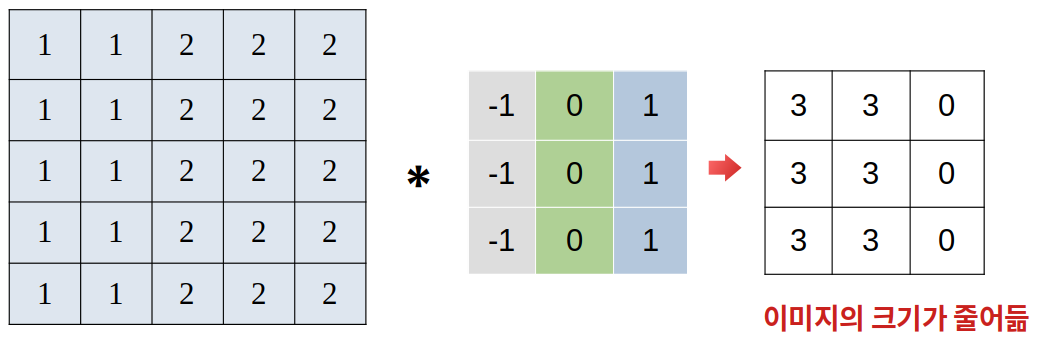   
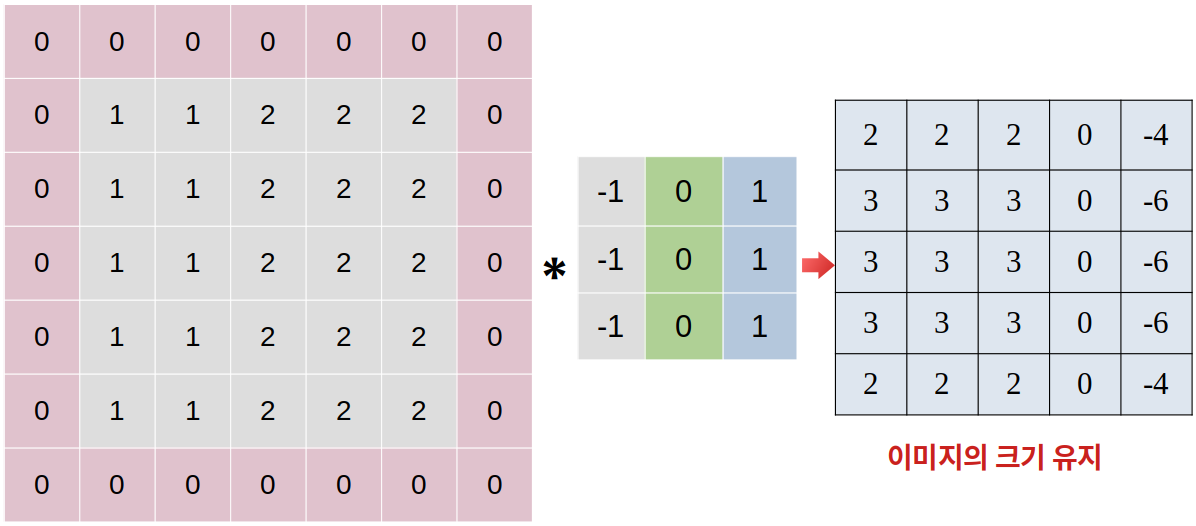
   
- padding 종류
    1. Constant Padding : 0 또는 1 등 지정된 상숫값으로 Padding(Zero-Padding 등)
        - Zero Padding의 장점 : 원본데이터ㅇ에 최소한의 영향을 주면서 이미지의 크기 유지 가능
    2. Replicate Padding : 이미지의 가장자피 픽셀을 복사
    3. Reflect Padding : 이미지의 경계에서 거울처럼 반사
- Padding의 특징
    - 대부분의 경우 Zero-Padding 사용
    - Padding의 크기를 조절 함으로써 출력 이미지의 크기를 일정 범위 내에서 제어 가능
    - 가운데 픽셀과 꼭지점픽셀의 활용 불균형을 완화
    - **결과적으로 이미지의 모든 부분이 분석에 균형 있게 기여할수 있게 되어 특징 추출의 품질 향상 및 모델 성능개선**

## 0-2 Stride
- 컨볼루션 필터가 이미지 위를 이동하는 보폭
    - 필터가 한 번에 몇칸씩 이동할지 결정
- stride = 1 : 모든 위치를 빠짐없이 살펴봐라
- stride값을 키우면?
    1. **특징 추출의 효율성** : 큰 stride를 사용하면 이미지를 더 넓은 안격으로 살펴보게 됨.
        - 이는 세세한 특징보다는 전반적인 특징을 추출하는 데 도움
    2. **계산량 감소** : stride를 늘리면 출력 크기가 줄어들어 연산량이 감소
        - 이는 모델의 학습과 추론 속도를 향상
- 단점은?
    1. **중요한 정보의 손실**을 초래하여 모델의 성능을 저하
- **따라서, 모델의 성능과 계산 효율성 사이의 균형을 고려하여 적절히 설정**

## 0-3 Pooling
- 주로 **입력 데이터의 공간적 크기를 줄이면서 중요한 특징을 보존하는 역할**
    - 특별한 점은 학습 가능한 파라미터 없이 동작
    - 각 특징 맵(채널)에 독립적으로 적용되므로, 채널 수는 불변
    <br>
- 주요 기법
    - Max Pooling
        - 지정된 영역에서 최댓값 선택
    - Average Pooling
        - 평균을 구하여 해당 영역을 대표하는 값으로 사용
- Pooling의 이점
    1. 데이터 압축: 공간적 크기를 줄여, 정보를 압축, 중요한 특징 보존
    2. 계산 효율성 향상 : 크기 감소로 후속 레이어의 연산량과 메모리 사용을 줄임
    3. Overfitting 위험 감소 : 모델의 복잡도를 낮춰 일반화 능력을 향상
    4. 특징 불변성 증가 : 입력의 작은 변화나 위치 변동에 덜 민감

#### Global Pooling
특별한 경우로 Pooling의 커널 크기를 입력 이미지의 전체 크기와 동일하게 설명하면, 이를 **Global Pooling**
- 특히 **Global Average Pooling(GAP)** 이 자주 등장
    - GAP는 각 특징맵의 모든 값들의 평균을 계산, 특징 맵 하나를 하나의 값으로 압축(보통 모델의 마지막 부분에서 특징을 요약할때 사용)
- 장점:
    - 입력이미지의 크기에 대한 유연성 제공(다양한 크기의 입력이미지를 유연하게 처리가능)
        - 주로 CNN의 마지막 부분에서 다중 분류를 위한 FC레이어 직전에 사용
        - 만약 GAP이 없다면? 입력 이미지의 크기가 변경될때 마다 FC 레이어의 구조를 수정해야하는 제약이 있음
    - GAP는 각 특징 맵을 하나의 값으로 압축하여 FC 레이어에 전달, 입력 이미지의 크기에 상관없이 고정된 크기의 출력을 FC레이어에 제공
    - GAP는 모델의 파라미터 수를 크게 줄여 모델의 복잡도를 낮추고 Overfitting 위험을 줄이는데 기여

# 1. CNN 전체 구조: 특징 추출 부터 분류까지
## 1-1 특징 추출
- 컨볼루션과 Pooling을 반복하면 일어나는 일
    - 특징 맵의 크기는 점점 작아지면서 점점 깊어짐(channel이 많아진다.)
    - 의미 : **각 픽셀이 점점 더 넓은 범위의 정보를 대표하게 되며, 동시에 더 많은 종류의 특징을 포착하게 된다는 것을 의미**
- 일반적으로 컨볼루션 레이어들을 거치면서 점점 더 많은 특징을 추출하도록 구성(하이퍼파라미터를 수정하여 이렇게 안할수도 있음)
    - 예를들어 첫번째 컨볼루션은 2개의 feature map, 두번째는 4개의 feature map을 생성


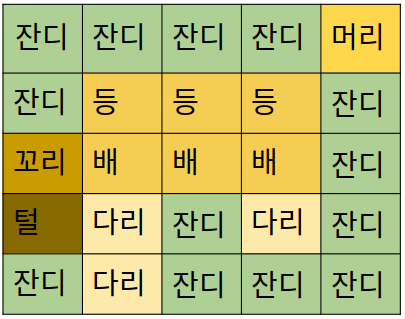
- 컨볼루션 레이어와 풀링과정을 거치면서 CNN은 크기는 작지만 다양한 특징을 포착한 여러개의 특징맵을 생성
    - 각 특징 맵은 서로 다른 특징을 담당, 저번에 보여드린 말이미지를 예로 들면 위 그림 처럼 위치별로 주요 특징을 표현
    - 이처럼 컨볼루션과 pooling 레이어를 통해 이미지의 복잡한 정보를 점진적으로 추상화하고 압축 가능
- 위 과정은 '나무를 보는 것으로 시작해 숲을 보는 능력을 AI에게 부여한다고 함
    - 즉, **초기 층에서는 선이나 모서리 같은 저수준 특징(나무)을 추출하고, 더 깊은 층에서는 이를 조합하여 눈, 코, 귀 와 같은 의미있는 고수준 특징(숲)을 추출**

## 1-2 분류
- 위의 과정으로 특징을 추출했다면 어떻게 최종적으로 분류를 할까?
<br>
<br>
<br>
- FC 레이어의 문제점을 다시한번 상기
    - 개별 픽셀에 과도한 의미를 부여, 이미지의 공간적 구조를 무시
- 하지만, 컨볼루션과 Pooling을 통해 이미지 정보가 충분히 정제된 다음에는 상황이 다름
    - 이 시전에는 FC 레이어의 사용이 굉장히 효과적
<br>
<br>
<br>
- **충분한 정체를 통해 고수준의 맵들을 얻은 후에는, 이제 모든 위치의 모든 특징값을 종합적으로 고려**
    - 따라서, 이를 위해 마지막 단계는 MLP를 사용
    - MLP는 각 특징 맵의 모든 위치 정보를 입력받아, 이들간의 복잡한 관계를 학습
    - 이는 마치 **잔디 배경에 전체적으로 갈색 털, 긴꼬리, 긴다리를 가진 동물이 있으니 말이구나!** 라고 판단
    - (약~~간 억지같긴 하지만, 아 이런 느낌이구나 하고 그러려니 넘어가 주시길 바랍니다.)

### 정리 CNN의 전체 구조
#### 1. 컨볼루션과 Pooling 레이어 : 이미지의 공간적 구조를 보존하면서 점진적으로 추상화된 특징을 학습
#### 2. MLP : 충분히 정제된 정보들을 종합적으로 분석하여 최종 분류 수행

# 2. VGG 

## 2.1 VGG 알쓸신잡
- 옥스포트대학교에서 2014년에 개발
- 2014년 ImageNet 챌린지 에서 2위
    - ImageNet(Image Classification 대회) 챌린지란?
        - 약 128만개의 훈련 이미지, 5만개의 검증이미지, 10만개의 테스트 이미지를 사용해서 1000개의 클래스로 사진을 분류하는 대회
        - 다양한 객체(동물, 풍경등등)를 클래스로 가지고 있어서 요즘은 image classification에서는 밴치마크 데이터 셋으로도 많이 사용
        - 대회의 성능 지표 = 모델이 예측한 상위 5개 클래스중 정답이 포함되지 않는 비율
    - 참고로 이때 1위은 GoogleNet
<br>
<br>
- top 5 에러율 계산법
    1. 각 이미지에 대해 1000개 클래스 각각의 확률을 출력
    2. 이 중 확률이 가장 높은 5개 클래스를 선택
    3. 실제 정답 클래스가 이 5개 중에 포함되어 있으면 정확한 예측으로 간주
        - 예시) 고양이 사진을 테스트 과정에 삽입 -> 알고리즘이 1위 개, 2위 고양이, 3위 호랑이, 4위 자동차, 5위 자전거 순서로 예즉 -> 5위 안에 고양이 클래스를 예측했으니, 정답으로 처리 -> 100장 싹다해서 평균
    4. 전체 테스트 셋에 대해 1~3과정을 반복, 5개 안에 정답이 포함되지 않는 비율을 계산
<br>
<br>
    - 에러율 계산법이 굉장히 쉬운거 같은데? 왜 이러한 에러율을 대회에서...
        1. ImageNet과 같이 클래스가 많은 경우, 정확히 한 클래스만 맞추는 것은 굉장히 어려움
        2. 하나의 이미지에 고양이, 개, 나무등 여러개의 객체들이 있을수 있기 때문
        3. 잘 분류했는지 못분류 했는지를 판정하는것이 사람이기 때문에 소량의 이미지만을 사용해야 사람마다의 의견차이가 줄어듬
- 딥러닝 모델들은 2012년 AlexNet이 최초, 이후 딥러닝 모델이 뛰어난 성능을 봉주고 있음

## 2.2 VGG

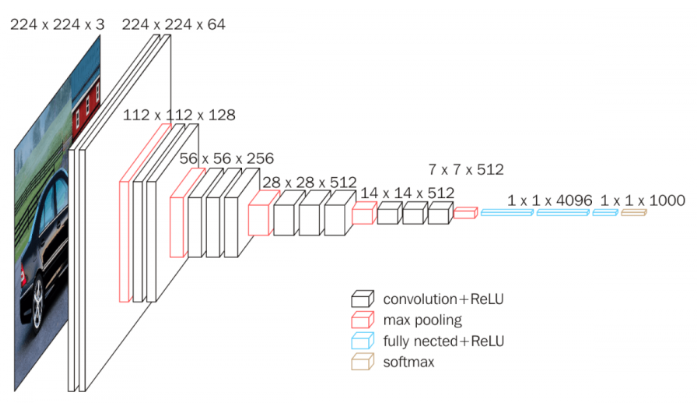
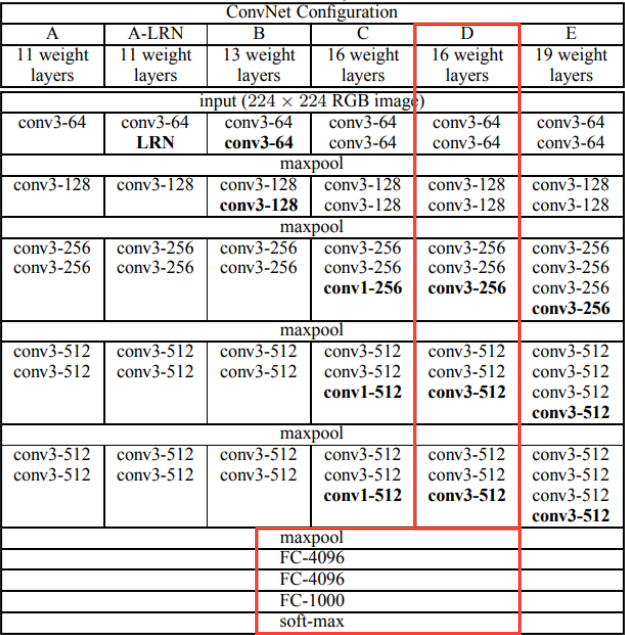

- VGG는 여러버전(A, B, C, D, E)이 제안되었는데 왼쪽으림이 다타내는 모델은 오른쪽 그림에서 D(빨간색 박스) 버전
    - 참고로 이 버전의 모든 컨볼루션(convolution) 레이어는 Padding = 1, Stride = (1, 1)을 사용
    - Max Pooling은 2x2크기로 Stride =(2, 2)를 사용하여 콩과할때 마다 이미지의 크기를 가로, 세로 각각 절반으로 축소

## 2.1 'D'모델 상세 구조

### 2.1.1 특징 추출 부분

1. 입력 : 224x224 크기의 RGB 이미지 (Shape : 3x224x224(채널 x 행 x 열))
2. 첫 번째 컨볼루션 블록:
    - conv3-64 : 커널 크기 3x3인 컨볼루션, 64개 필터 사용(shape : 64x3x3x3(개x채x행x열))
    - 결과 Shape : 64x224x224
    - 한번더 conv3-64 통과 (필터 shape : 64x64x3x3(개x채x행x열))
    - 결과 Shape : 64x224x224
    - Max Pooling으로 축소
    - 결과 shape : 64x112x112
3. 두 번째 컨볼루션 블록:
    - conv3-128 : 128개 필터 사용(shape : 128x64x3x3(개x채x행x열))
    - 결과 Shape : 128 x 112 x 112
    - 한번 더 conv3-128 통과 (필터 shape : 128x128x3x3(개x채x행x열))
    - 결과 Shape : 128 x 112 x 112
    - Max Pooling으로 축소
    - 결과 shape : 128x56x56

- 이러한 패턴이 계속 반복되며, 세 번째 블록부터는 연속 3개의 컨볼루션 레이어를 사용
    - 블록을 거치며 필터의 수는 두 배씩 증가하는 것을 확인 (64 -> 128 -> 256 -> 512)
- 마지막 컨볼루션 블록을 통과한 후에는 512 x 7 x 7크기의 특징 맵을 얻게됨
    - 이는 224x224 크기의 입력이미지가 다섯 번의 Max Pooling을 거쳐 각 차원이 $2^5$ 으로 나워진 결과

### 2.1.2 분류 부분
- 컨볼루션 블록들을 모두 통과한 후, 모델은 MLP를 사용하여 최종 분류를 수행.

1. Flatten: 512x7x7 크기의 특징 맵을 25,088개의 1차원 벡터로 변환, 이는 3차원 데이터를 1차원으로 펼치는 작업
2. MLP
    - FC-4096: 25088개 노드를 4096개 노드로 연결
    - 다시 FC-4096 : 4096개 노드를 유지
    - FC-1000 : 최종적으로 1000개 노드로 축소(ImageNet의 1000개 클래스 대응)
3. Softmax와 Cross-Entropy Loss : 마지막 1,000개 노드에 Softmax를 적용하고 Cross-Entropy Loss를 계산
4. 역전파와 최적화: 계산된 Loss를 바탕으로 역전파를 수행, 그래디언트를 구하고, Adam과 같은 최적화 알고리즘을 사용하여 전체 네트워크의 파라미터를 업데이트

### 2.2 직관적인 이해
- 아래의 이미지는 단순 예시라고 생각하시면 됩니다. VGG랑은 아무상관없는 단순 Max Pooling을 이미지로 보여드릴려고 그려놓은 그림입니다.
- 224x224로 그렸으면 이해가 쉬우셨을텐데, 양해 부탁드립니다.   
   
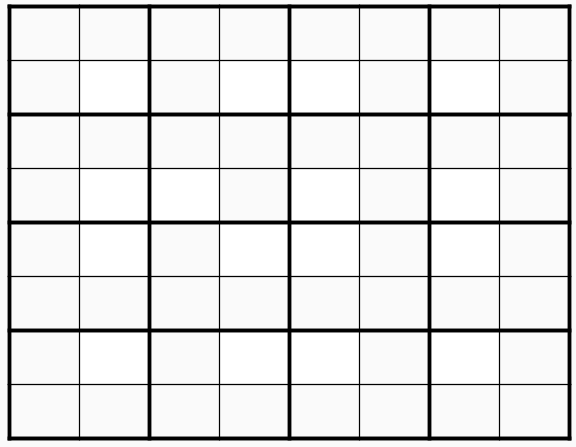

1. 원본이미지의 각 픽셀 : 위의 이미지에의 각 네모 한칸을 이미지의 1픽셀로 봅시다

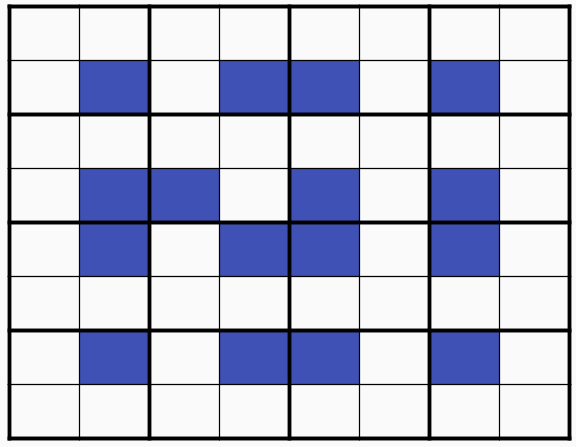   

2. 파란 픽셀 : 첫번째 Max Pooling에서 선택된 픽셀

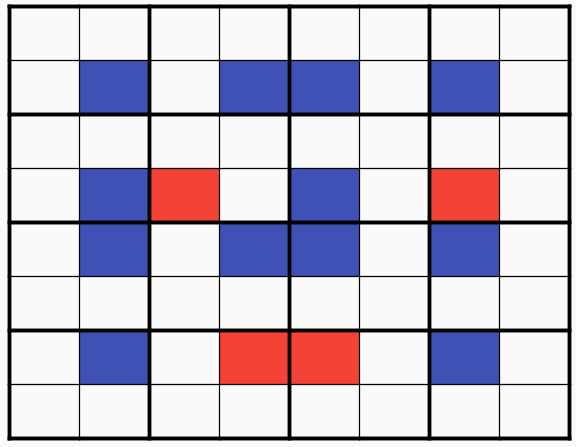   

3. 빨간 픽셀 : 두번째 MaxPooling에서 선택된 픽셀

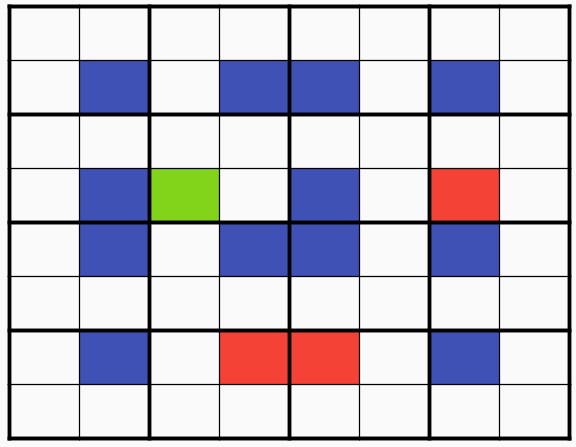   

4. 초록 픽셀 : 세번째 Max Pooling에서 선택된 픽셀
5. 네 번째 Max pooling에서 선택된 픽셀
6. 마지막 7x7 특징맵 : 마지막 다섯 번째 Max Pooling을 통해 최종적으로 선출된 49개의 픽셀은 각각 이미지의 다른 영역을 담당 하며, 각영역에 대해 512가지의 특징정보를 가지고 있음
    - 즉, 7x7 특징맵의 각 픽셀들은 이미지의 특정 엉역에 대한 512가지 특징을 담고 있는 것
        - 이미지의 각 영역별로 다양한 특징들의 강도가 픽셀값으로 표현

- MLP는 이 49개의 이미지 영역의 512가지 특징을 종합적으로 분석하여 최종 분류를 수행
    - 이는 49개의 다양한 특성을 종합적으로 고려하여 하나의 이미지의 현황을 판단하는 것
- MLP는 이러한 고수준의 특징들 간의 복잡한 관계를 학습, 이미지가 어떤 플래스에 속하는 지를 결정
- 예를들어, 강아지 이미지를 분류할 때:
    1. 어떤 픽셀(7x7)은 이미지 좌상단을 대표, 이 영역에서 '둥근 형태'나 '털의 질감'같은 특징을 강하게 나타낼수 있음
    2. 어떤 픽셀(7x7)은 이미지 중앙을 대표, 이 영역에서 '4개의 다리'나 '몸통의 형태'같은 특징을 강하게 나타낼수 있음
    3. 어떤 픽셀(7x7)은 이미지 하단을 대표, 이 영역에서 '꼬리의 존재'나 '바닥과의 접촉'같은 특징을 강하게 나타낼수 있음
    - 이와 같은 정보를 도합하여, "이 이미지는 둥근 형태, 털이 있음, 4개의 다리, 꼬리 등이 있으므로 강하지일 확률이 70%"와 같은 결론을 내림
    - 이러한 방식으로 VGG은 이미지의 지역적 특징과 전체적 구조를 모두 고려하여 정확한 분류를 수행, 이는 다양한 클래스(강아지, 고양이, 자동차 등)에 대해 동일한 원리로 적용

## VGG의 한계
1. 파라미터 분포의 불균형 : VGG-19 모델(E)은 총 1억 4천만개 가량의 파라미터가 있는데, 이중에 1억 2천만개가 MLP에 집중
    - 이는 특징 추출 보다 분류에 과도하게 치중
2. Overfitting 위험 : 많은 파라미터가 MLP에 분포, 높은 Overfitting 위험
3. 계산 비용 : 깊은 구조와 많은 파라미터로 인해 학습과 추론데 많은 계산 자원이 필요

- **그러나 VGGnet의 단순하고 규칙적인 구조는 큰 장점이 되어, 후속연구에 많은 영향을 미침**